# **Making Dataset**

In [1]:
# setwd("/home/username/courses/datascience/project/set-a/")
# setwd("Downloads/intern/set-a")
import os
desired_dir = "C:\\Users\\sai\\Downloads\\intern\\set-a"

try:
  os.chdir(desired_dir)
  print(f"Successfully changed working directory to {desired_dir}")
except FileNotFoundError:
  print(f"Error: Directory '{desired_dir}' not found.")


Successfully changed working directory to C:\Users\sai\Downloads\intern\set-a


In [2]:
os.getcwd()

'C:\\Users\\sai\\Downloads\\intern\\set-a'

In [3]:
import os
import pandas as pd

# List all .txt files in the current directory
filelist = [f for f in os.listdir() if f.endswith('.txt')]

# Read all files into a list of DataFrames
patient_dat = [pd.read_csv(f, header=0) for f in filelist]

In [4]:
import pandas as pd
import numpy as np

def comp_patient(ind, dat):
    pat_dat = dat[ind]
    pat_dat.replace(-1.0, np.nan, inplace=True)
    
    Urine = pat_dat.loc[pat_dat['Parameter'] == "Urine", 'Value'].mean()
    HR = pat_dat.loc[pat_dat['Parameter'] == "HR", 'Value'].mean()
    Temp = pat_dat.loc[pat_dat['Parameter'] == "Temp", 'Value'].mean()
    age = pat_dat.loc[pat_dat['Parameter'] == "Age", 'Value'].values[0]
    Gender = pat_dat.loc[pat_dat['Parameter'] == "Gender", 'Value'].values[0]
    ICUtype = pat_dat.loc[pat_dat['Parameter'] == "ICUType", 'Value'].values[0]
    height = pat_dat.loc[pat_dat['Parameter'] == "Height", 'Value'].values[0]
    weight = pat_dat.loc[pat_dat['Parameter'] == "Weight", 'Value'].mean()
    NIDiasABP = pat_dat.loc[pat_dat['Parameter'] == "NIDiasABP", 'Value'].mean()
    SysABP = pat_dat.loc[pat_dat['Parameter'] == "SysABP", 'Value'].mean()
    DiasABP = pat_dat.loc[pat_dat['Parameter'] == "DiasABP", 'Value'].mean()
    pH = pat_dat.loc[pat_dat['Parameter'] == "pH", 'Value'].mean()
    PaCO2 = pat_dat.loc[pat_dat['Parameter'] == "PaCO2", 'Value'].mean()
    PaO2 = pat_dat.loc[pat_dat['Parameter'] == "PaO2", 'Value'].mean()
    Platelets = pat_dat.loc[pat_dat['Parameter'] == "Platelets", 'Value'].mean()
    MAP = pat_dat.loc[pat_dat['Parameter'] == "MAP", 'Value'].mean()
    K = pat_dat.loc[pat_dat['Parameter'] == "K", 'Value'].mean()
    Na = pat_dat.loc[pat_dat['Parameter'] == "Na", 'Value'].mean()
    FiO2 = pat_dat.loc[pat_dat['Parameter'] == "FiO2", 'Value'].mean()
    GCS = pat_dat.loc[pat_dat['Parameter'] == "GCS", 'Value'].mean()
    MechVent = pat_dat.loc[pat_dat['Parameter'] == "MechVent", 'Value'].mean()
    ID = pat_dat['Value'].values[0]
    
    return pd.DataFrame({
        'ID': [ID], 'age': [age], 'Gender': [Gender], 'height': [height], 'ICUtype': [ICUtype],
        'weight': [weight], 'Urine': [Urine], 'HR': [HR], 'Temp': [Temp], 'NIDiasABP': [NIDiasABP],
        'SysABP': [SysABP], 'DiasABP': [DiasABP], 'pH': [pH], 'PaCO2': [PaCO2], 'PaO2': [PaO2],
        'Platelets': [Platelets], 'MAP': [MAP], 'K': [K], 'Na': [Na], 'FiO2': [FiO2], 'GCS': [GCS],
        'MechVent': [MechVent]
    })

# Assuming patient_dat is a list of DataFrames
numpats = 4000
df_list = [comp_patient(i, patient_dat) for i in range(numpats)]

# Assemble into a single DataFrame
allpat_dat = pd.concat(df_list, ignore_index=True)

In [5]:
# Read the outcomes data
outcome_dat = pd.read_csv("C:\\Users\\Sai\\Downloads\\intern\\solution-engine (1).txt")
outcome_dat.replace(-1, np.nan, inplace=True)

# Merge the patient data with the outcomes data
full_dat = pd.merge(allpat_dat, outcome_dat, left_on="ID", right_on="ID")
full_dat.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set NaN values to the mean of the column
full_dat = full_dat.apply(lambda x: x.fillna(x.mean()), axis=0)

In [6]:
csv_file_path = 'C:\\Users\\Sai\\Downloads\\intern\\ICU_data.csv'
full_dat.to_csv(csv_file_path, index=False)

In [7]:
df = pd.read_csv('C:\\Users\\Sai\\Downloads\\intern\\ICU_data.csv')
df.shape

(4000, 27)

# **EDA**

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Sai\\Downloads\\intern\\ICU_data.csv')
df.isnull().sum()

ID                   0
age                  0
Gender               0
height               0
ICUtype              0
weight               0
Urine                0
HR                   0
Temp                 0
NIDiasABP            0
SysABP               0
DiasABP              0
pH                   0
PaCO2                0
PaO2                 0
Platelets            0
MAP                  0
K                    0
Na                   0
FiO2                 0
GCS                  0
MechVent             0
SAPS-I               0
SOFA                 0
Length_of_stay       0
Survival             0
In-hospital_death    0
dtype: int64

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4000 non-null   float64
 1   age                4000 non-null   float64
 2   Gender             4000 non-null   float64
 3   height             4000 non-null   float64
 4   ICUtype            4000 non-null   float64
 5   weight             4000 non-null   float64
 6   Urine              4000 non-null   float64
 7   HR                 4000 non-null   float64
 8   Temp               4000 non-null   float64
 9   NIDiasABP          4000 non-null   float64
 10  SysABP             4000 non-null   float64
 11  DiasABP            4000 non-null   float64
 12  pH                 4000 non-null   float64
 13  PaCO2              4000 non-null   float64
 14  PaO2               4000 non-null   float64
 15  Platelets          4000 non-null   float64
 16  MAP                4000 

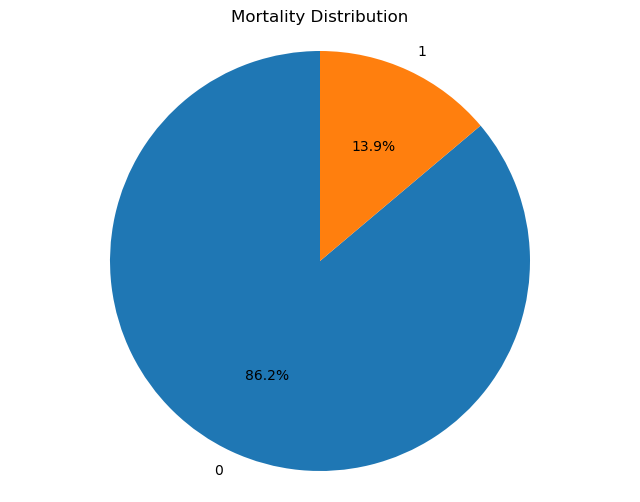

In [40]:
death_counts = df['In-hospital_death'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Mortality Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [4]:
df['In-hospital_death'].value_counts()

In-hospital_death
0    3446
1     554
Name: count, dtype: int64

### 3446 survived , 554 death

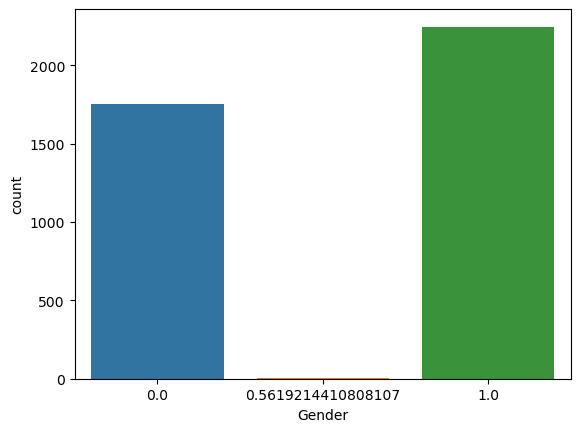

In [5]:
sns.countplot(x="Gender", data=df)
# plt.title('Gender')
plt.show()

In [6]:
df['Gender'].unique()

array([0.        , 1.        , 0.56192144])

In [7]:
# Replace all values except 0 or 1 with 1
condition = ~df['Gender'].isin([0, 1])
df.loc[condition, 'Gender'] = 1

In [8]:
df['Gender'].unique()

array([0., 1.])

In [9]:
df['Gender'].value_counts()

Gender
1.0    2249
0.0    1751
Name: count, dtype: int64

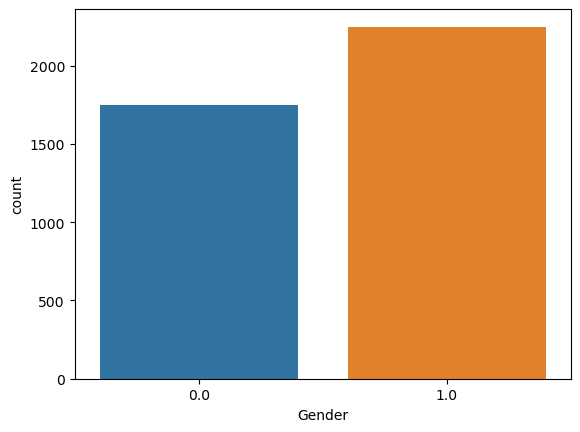

In [10]:
sns.countplot(x="Gender", data=df)
# plt.title('Mortality by gender')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

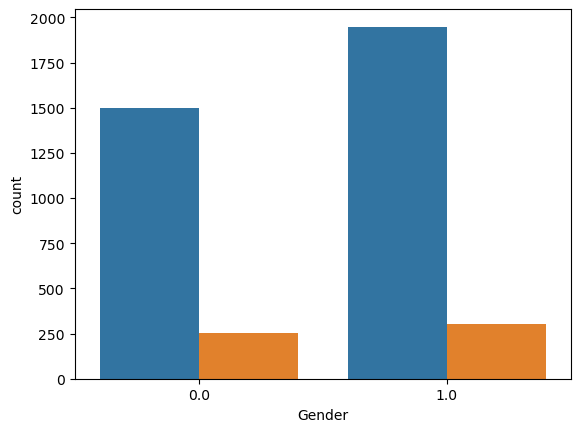

In [11]:
sns.countplot(x="Gender", data=df , hue = "In-hospital_death")
plt.title('Mortality by gender')
plt.show()

### 1.0 = Male
### 0.0 = Female
### blue = survived , orange = death

In [ ]:
sns.countplot(x="ICUtype", data=df)
plt.title('ICUType distribution')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

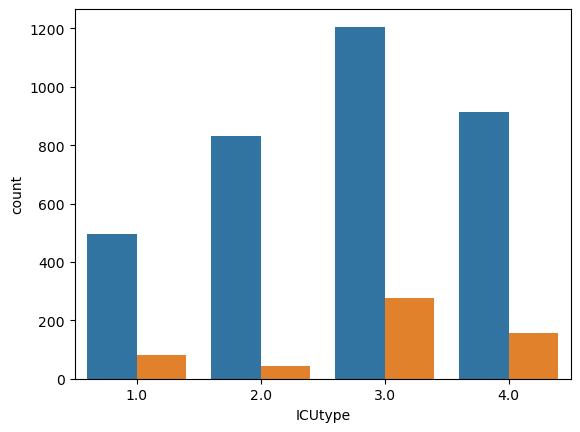

In [12]:
sns.countplot(x="ICUtype", data=df,hue = "In-hospital_death")
plt.title('ICUType distribution by Mortality')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


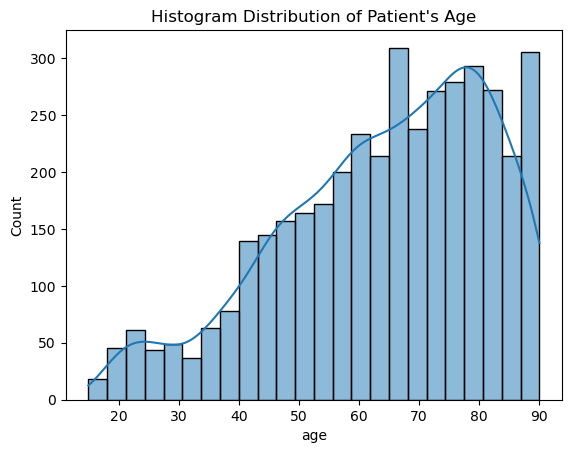

In [13]:
plt.title("Histogram Distribution of Patient's Age")
sns.histplot(df['age'], kde = True);

In [14]:
df.columns

Index(['ID', 'age', 'Gender', 'height', 'ICUtype', 'weight', 'Urine', 'HR',
       'Temp', 'NIDiasABP', 'SysABP', 'DiasABP', 'pH', 'PaCO2', 'PaO2',
       'Platelets', 'MAP', 'K', 'Na', 'FiO2', 'GCS', 'MechVent', 'SAPS-I',
       'SOFA', 'Length_of_stay', 'Survival', 'In-hospital_death'],
      dtype='object')

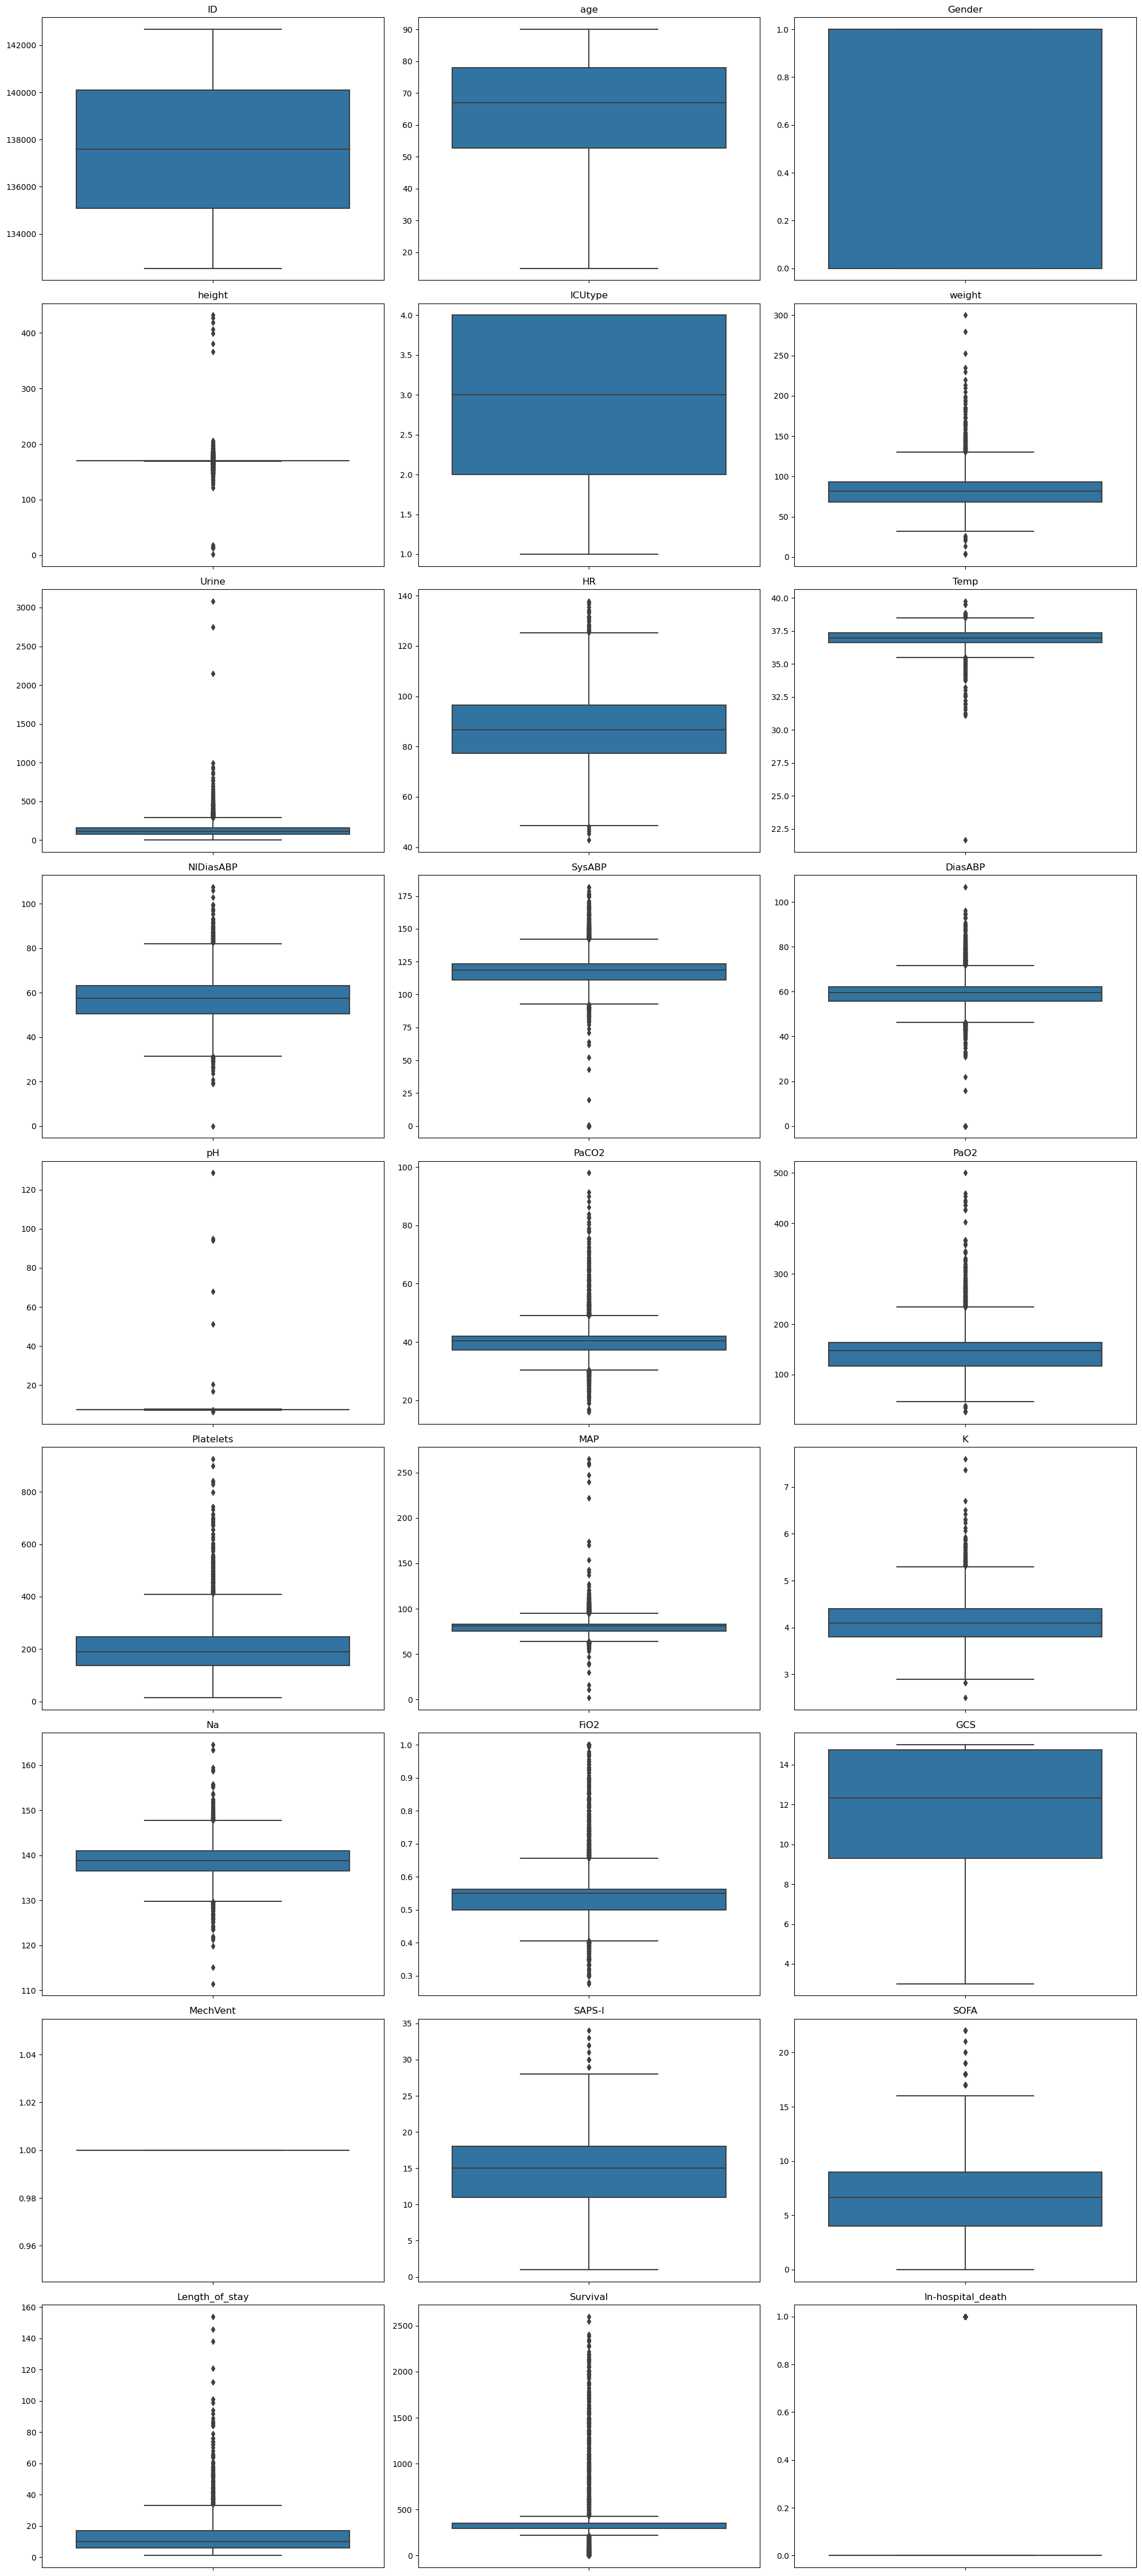

In [15]:
import math
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 3)  # Adjust the number of columns per row as needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))  # Adjust the size as needed

# Flatten the axes array for easy iteration if it has more than one dimension
if num_rows > 1:
    axes = axes.flatten()

# Loop through each column in the DataFrame and create a boxplot
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Mostly all columns contain Outliers

# **Logistic Regression**

In [16]:
X = df.drop(['ID', 'MechVent', 'SAPS-I',
       'SOFA', 'Length_of_stay', 'Survival','In-hospital_death'], axis = 1)
y = df['In-hospital_death'].copy()

In [17]:
X.shape

(4000, 20)

In [18]:
y.shape

(4000,)

In [19]:
from sklearn.model_selection import train_test_split
# First, split the data into 70% training and 30% remaining
train_df, remaining_df = train_test_split(X, test_size=0.3, random_state=42)

# Then, split the remaining data into 50% testing and 50% validation (which is 15% each of the original data)
test_df, val_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

In [20]:
# First, split the data into 70% training and 30% remaining
y_train_df, y_remaining_df = train_test_split(y, test_size=0.3, random_state=42)

# Then, split the remaining data into 50% testing and 50% validation (which is 15% each of the original data)
y_test_df, y_val_df = train_test_split(y_remaining_df, test_size=0.5, random_state=42)

In [21]:
train_df.shape

(2800, 20)

In [22]:
train_df.head()

,age,Gender,height,ICUtype,weight,Urine,HR,Temp,NIDiasABP,SysABP,DiasABP,pH,PaCO2,PaO2,Platelets,MAP,K,Na,FiO2,GCS
3215,72.0,1.0,169.787227,3.0,83.043044,92.341463,72.792453,36.807692,45.181818,93.652174,47.739130,7.355000,53.500000,74.500000,237.333333,62.434783,4.133333,143.666667,0.350000,15.000000
3126,67.0,0.0,167.600000,2.0,102.688235,82.170213,84.923077,37.338462,41.333333,117.958904,47.972603,7.368824,38.285714,145.071429,99.000000,67.438356,5.000000,139.666667,0.660000,11.285714
697,48.0,1.0,172.700000,3.0,79.000000,242.000000,101.812500,36.972727,55.300000,126.204545,69.318182,7.400000,35.000000,87.000000,227.500000,87.386364,3.950000,139.000000,0.549199,14.973684
3613,75.0,1.0,169.787227,3.0,78.000000,59.083333,107.547170,36.810000,54.500000,111.695652,58.239130,7.398000,47.500000,109.300000,324.600000,75.804348,4.180000,147.000000,0.537500,7.615385
2374,51.0,1.0,169.787227,3.0,83.043044,134.017937,87.159565,36.956125,57.351445,118.591225,59.543420,7.410000,36.000000,195.500000,169.000000,81.055075,3.966667,137.666667,0.549199,11.604248


In [23]:
test_df.shape

(600, 20)

In [24]:
val_df.shape

(600, 20)

In [25]:
y_train_df.shape

(2800,)

In [26]:
y_test_df.shape

(600,)

In [27]:
y_val_df.shape

(600,)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(train_df, y_train_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_test_pred = model.predict(test_df)
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test_df, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_df, y_test_pred))
print("Classification Report:\n", classification_report(y_test_df, y_test_pred))

Test Set Evaluation:
Accuracy: 0.87
Confusion Matrix:
 [[514   3]
 [ 75   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       517
           1       0.73      0.10      0.17        83

    accuracy                           0.87       600
   macro avg       0.80      0.55      0.55       600
weighted avg       0.85      0.87      0.82       600



In [30]:
y_val_pred = model.predict(val_df)
print("Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val_df, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val_df, y_val_pred))
print("Classification Report:\n", classification_report(y_val_df, y_val_pred))

Test Set Evaluation:
Accuracy: 0.865
Confusion Matrix:
 [[510   4]
 [ 77   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       514
           1       0.69      0.10      0.18        86

    accuracy                           0.86       600
   macro avg       0.78      0.55      0.55       600
weighted avg       0.84      0.86      0.82       600



In [31]:
type(train_df)

pandas.core.frame.DataFrame

In [32]:
# variable = pd.Dataframe(
    
# )

In [ ]:
# testing = model.predict()

# **ROC curve**

In [63]:
from sklearn.preprocessing import StandardScaler
def preprocess_input(user_input):
    # Assuming the model expects features in the same order as the training data
    # For example, if the model was trained on features: 'age', 'salary', 'education_level'
    features = ['age','Gender','height','ICUtype','weight','Urine','HR','Temp','NIDiasABP','SysABP','DiasABP','pH','PaCO2','PaO2','Platelets','MAP','K','Na','FiO2','GCS']  # Replace with your actual feature names
    input_data = pd.DataFrame([user_input], columns=features)
    
    # # Example of preprocessing steps: handling missing values, scaling, encoding, etc.
    # # This should match the preprocessing steps used during training
    input_data.fillna(0, inplace=True)  # Example: filling missing values
    # scaler = StandardScaler()
    # input_data_scaled = scaler.fit_transform(input_data)  # Example: scaling features
    
    return input_data

def predict_user_input():
    # Taking user input for each feature
    user_input = {
        # 'ID': float(input("Enter the ID: ")),
        
        'age': float(input("Enter the age: ")),
        'Gender': float(input("Enter the Gender (0 for male and 1 for Female) : ")),
        
        'height': float(input("Enter the height: ")),
        'ICUtype': float(input("Enter the ICUtype: ")),
        'weight': float(input("Enter the weight: ")),
        'Urine': float(input("Enter the Urine : ")),

        'HR': float(input("Enter the HR : ")),
        'Temp': float(input("Enter the temperature : ")),
        'NIDiasABP': float(input("Enter the NIDiasABP Value : ")),

        'SysABP	': float(input("Enter the value of SysABP	: ")),
        'DiasABP': float(input("Enter the value of DiasABP: ")),
        'pH	': float(input("Enter the pH value : ")),
        
        'PaCO2': float(input("Enter the value of PaCO2 : ")),
        'PaO2': float(input("Enter the value of PaO2: ")),
        'Platelets': float(input("Enter the VALUE OF Platelets : ")),

        'MAP': float(input("Enter the MAP value : ")),    
        'K': float(input("Enter the K value : ")),
        'Na': float(input("Enter the Na Value : ")),
        'FiO2': float(input("Enter the FiO2 value : ")),
        'GCS': float(input("Enter the GCS Value : ")),
    }
    
    # Preprocess the user input
    processed_input = preprocess_input(user_input)
    
    # Predict the output using the loaded model
    prediction = model.predict(processed_input)
    
    # Output the prediction
    print("Prediction:", prediction[0])

In [65]:
predict_user_input()

Enter the age:  81.0
Enter the Gender (0 for male and 1 for Female) :  0.0
Enter the height:  169.78
Enter the ICUtype:  4.0
Enter the weight:  83.04
Enter the Urine :  88.97
Enter the HR :  76.68
Enter the temperature :  36.49
Enter the NIDiasABP Value :  55.5
Enter the value of SysABP	:  143.69
Enter the value of DiasABP:  60.831
Enter the pH value :  7.35
Enter the value of PaCO2 :  45.6
Enter the value of PaO2:  109.9
Enter the VALUE OF Platelets :  164.6
Enter the MAP value :  90.80
Enter the K value :  3.9
Enter the Na Value :  140.5
Enter the FiO2 value :  0.6
Enter the GCS Value :  15.1


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [59]:
predict_user_input()

Enter the ID:  999999
Enter the age:  81.0
Enter the Gender (0 for male and 1 for Female) :  0.0
Enter the height:  169.78
Enter the weight:  83.04
Enter the Urine :  88.97
Enter the HR :  76.68
Enter the temperature :  36.49
Enter the NIDiasABP Value :  55.5
Enter the value of SysABP	:  143.69
Enter the value of DiasABP:  60.831
Enter the pH value :  7.35
Enter the value of PaCO2 :  45.6
Enter the value of PaO2:  109.9
Enter the VALUE OF Platelets :  164.6
Enter the MAP value :  90.80
Enter the K value :  3.9
Enter the Na Value :  140.5
Enter the FiO2 value :  0.6
Enter the GCS Value :  15.0


Prediction: 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


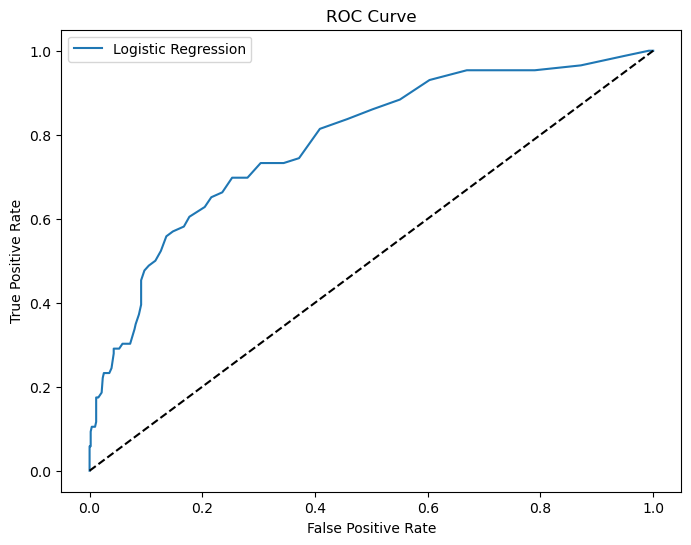

In [34]:
import numpy as np
def calculate_tpr_fpr(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    return tpr, fpr

# Predict probabilities on the validation set
y_val_prob = model.predict_proba(val_df)[:, 1]

# Calculate TPR and FPR for 100 threshold values equally spaced from 0 to 1
thresholds = np.linspace(0, 1, 100)
tpr_values = []
fpr_values = []

for threshold in thresholds:
    tpr, fpr = calculate_tpr_fpr(y_val_df, y_val_prob, threshold)
    tpr_values.append(tpr)
    fpr_values.append(fpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
# Find the FPR at TPR closest to 0.9
target_tpr = 0.9
closest_index = np.argmin(np.abs(np.array(tpr_values) - target_tpr))
closest_tpr = tpr_values[closest_index]
corresponding_fpr = fpr_values[closest_index]

print(f"The False Positive Rate at a True Positive Rate of {closest_tpr*100:.1f}% is {corresponding_fpr*100:.1f}%.")

The False Positive Rate at a True Positive Rate of 88.4% is 55.1%.


In [36]:
import numpy as np

# Scenario 1: Reviewing All Patient Charts
def calculate_failures(total_patients, total_time, critical_patients):
    time_per_file = total_time / total_patients
    prob_fail = np.exp(-time_per_file**2 / 100)
    expected_failures = critical_patients * prob_fail
    percentage_die = (expected_failures / total_patients) * 100
    return expected_failures, percentage_die

# Given data
total_patients = 25
total_time = 60  # minutes
critical_patients = 10

# Calculate for Scenario 1
expected_failures, percentage_die = calculate_failures(total_patients, total_time, critical_patients)
print(f"Scenario 1 - Expected deaths: {expected_failures:.2f}, Percentage: {percentage_die:.2f}%")

# Scenario 2: Proportional Time Based on Validation Set
# Assuming validation set size (N) as 100 for calculation
N = 100
proportional_time = (N / total_patients) * total_time

# Calculate for Scenario 2
expected_failures, percentage_die = calculate_failures(total_patients, proportional_time, critical_patients)
print(f"Scenario 2 - Expected deaths: {expected_failures:.2f}, Percentage: {percentage_die:.2f}%")

# Scenario 3: Reviewing Files with Model Output > 20%
# Assuming M (number of patients with > 20% risk) as 15 for calculation
M = 15

def calculate_failures_with_risk_threshold(M, total_patients, total_time, critical_patients):
    time_per_file = total_time / M
    prob_fail = np.exp(-time_per_file**2 / 100)
    expected_failures = critical_patients * prob_fail
    non_reviewed_deaths = critical_patients * ((total_patients - M) / total_patients)
    total_deaths = expected_failures + non_reviewed_deaths
    return total_deaths

# Calculate for Scenario 3
total_deaths = calculate_failures_with_risk_threshold(M, total_patients, total_time, critical_patients)
percentage_die = (total_deaths / total_patients) * 100
print(f"Scenario 3 - Expected deaths: {total_deaths:.2f}, Percentage: {percentage_die:.2f}%")

#


Scenario 1 - Expected deaths: 9.44, Percentage: 37.76%
Scenario 2 - Expected deaths: 3.98, Percentage: 15.92%
Scenario 3 - Expected deaths: 12.52, Percentage: 50.09%


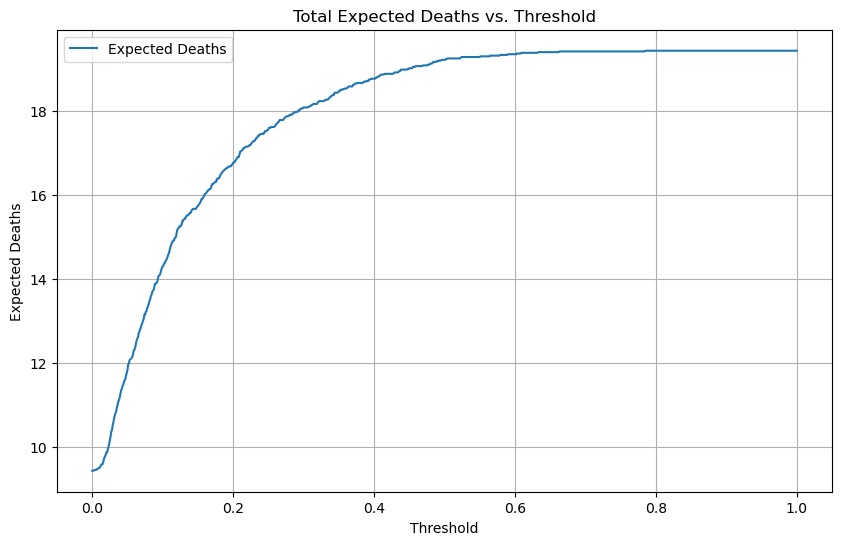

In [37]:
def calculate_expected_deaths(threshold, total_patients, total_time, critical_patients):
    # Filter patients whose probability of death exceeds the threshold
    patients_above_threshold = np.sum(y_val_prob > threshold)
    
    # Calculate time per file
    time_per_file = total_time / total_patients
    
    # Calculate the probability of missing correct treatment per patient
    prob_fail = np.exp(-time_per_file**2 / 100)
    
    # Calculate the expected number of patients where intervention fails
    expected_failures = critical_patients * prob_fail
    
    # Patients not reviewed (with risk ≤ threshold)
    non_reviewed_deaths = critical_patients * ((total_patients - patients_above_threshold) / total_patients)
    
    # Total expected deaths
    total_deaths = expected_failures + non_reviewed_deaths
    
    return total_deaths

# Given data
total_patients = len(y_val_df)
total_time = (total_patients / 25) * 60  # minutes
critical_patients = 10

# Threshold sequence
thresholds = np.arange(0, 1.001, 0.001)

# Calculate expected deaths for each threshold
expected_deaths = [calculate_expected_deaths(threshold, total_patients, total_time, critical_patients) for threshold in thresholds]

# Plot the total number of expected deaths vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, expected_deaths, label='Expected Deaths')
plt.xlabel('Threshold')
plt.ylabel('Expected Deaths')
plt.title('Total Expected Deaths vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
# Calculate the total number of expected deaths under the best policy selected in Part 6(b)
best_threshold = thresholds[np.argmin(expected_deaths)]
best_policy_expected_deaths = calculate_expected_deaths(best_threshold, len(y_test_df), total_time, critical_patients)

# Calculate the total number of expected deaths when reviewing each patient's file on the test set
all_reviewed_expected_deaths = calculate_expected_deaths(0, len(y_test_df), total_time, critical_patients)

# Calculate the percentage reduction in expected deaths
percentage_reduction = ((all_reviewed_expected_deaths - best_policy_expected_deaths) / all_reviewed_expected_deaths) * 100

# Print the results
print("Total expected deaths under the best policy from Part 6(b):", best_policy_expected_deaths)
print("Total expected deaths when reviewing each patient's file on the test set:", all_reviewed_expected_deaths)
print("Percentage reduction in expected deaths:", percentage_reduction, "%")


Total expected deaths under the best policy from Part 6(b): 9.440274829178357
Total expected deaths when reviewing each patient's file on the test set: 9.440274829178357
Percentage reduction in expected deaths: 0.0 %


# **LOGISTIC REGRESSION FROM SCRATCH**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

In [59]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [60]:

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient
    

In [61]:

def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll
    

In [62]:

def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient


In [63]:
df = pd.read_csv('C:\\Users\\Sai\\Downloads\\intern\\ICU_data.csv')

In [64]:
X = df.drop(['ID', 'MechVent', 'SAPS-I',
       'SOFA', 'Length_of_stay', 'Survival','In-hospital_death'], axis = 1)
y = df['In-hospital_death'].copy()

In [65]:
X.shape

(4000, 20)

In [66]:
y.shape

(4000,)

In [67]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))


Training time (Log Reg using Gradient descent):0.2513267993927002 seconds
Learning rate: 0.1
Iteration: 1000


In [68]:
result = sigmoid(X, theta)

In [70]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['In-hospital_death']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


86.15